In [1]:
%run ./functions.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sawal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
name_column_blacklist = ["entreprises", "entreprise", "specialistes", "specialiste", "specialisation", "specialisees", "specialisee", "specialite", "specialites", "specialiser","specialise", "specialises"]
name_column_regex_replace = {r"\'": "", r"\s+": " ", r"erie": "", r"\d+": ""}

In [3]:
data = pd.read_csv("./INPUT/act_couv.csv", sep=";")
# transform target to binary
data["target"] =data["class"].astype(int)
data

,description,class,target
0,entreprises de menuiserie fabricant de porte p...,False,0
1,cheminees accessoires specialiste du fer forg...,False,0
2,bricolage outillage reproduction de cle robin...,False,0
3,vente pose de revetements de sols et de murs ...,False,0
4,vente installation de chauffage vente inst...,True,1
...,...,...,...
6658,activite non renseignee,True,1
6659,plombiers,True,1
6660,magasins d electromenager livraison a domicile...,False,0
6661,entreprises de menuiserie,False,0


## Classes désequilibreés  et métriques

Nous avons beaucoup d'individus avec class=False par rapport à class=True.
Par conséquent, nous devons choisir avec soin les mesures de performance appropriées.


La **précision** est une bonne mesure pour déterminer quand les coûts des faux positifs sont élevés
Le **recall** est une métrique utilisée lorsque qu’ 'il y a un coût élevé associé aux faux négatifs.                
Pour trouver le juste milieur entre les deux, on pourrait utiliser le **F1- score**.
Cependant, ces métriques restent très dependant de la matrices de confusion et de l'affectation des classes
Pour ces genres de cas de données deséquilibrés il est préferable d'uiliser l'aire sous courbe ROC appélé **AUC**
L’air sous la courbe ROC est un indicateur synthétique de classificateur.
 L’idée de la courbe ROC est de faire varier le seuil l e 1 à 0 et, pour chaque cas, calculer le TVP et le TFP. Ces résultats sont représentés sous forme de graphique avec en absence 1-spécificité et en ordonnées la sensibilité.


L’aire sous la courbe indique la probabilité pour que la fonction SCORE place un positif devant un négatif (dans le meilleur des cas AUC = 1) .  L’aire sous la courbe ROC est utilisé le plus souvent dans des problèmes de classification binaire parce que :
- Il Indépendant des matrices de coûts de mauvaise affectation.

- Il est opérationnel même dans le cas des distributions très déséquilibrées

- Il permet la Comparaison plusieurs modèles quelle que soit la matrice de coût

- Lees résultats restent valables même si l’échantillon test n’est pas représentatif
- Un indicateur synthétique facilement interprétable

**Attention** Il est important  ici de prédire ici à la probabilité d'apparténance des classes(important pour construire ROC) au lieu de prédire directement les classes . Nous nous occupérons nous meme de l'affectation des classes en utilisant nos connaissances;

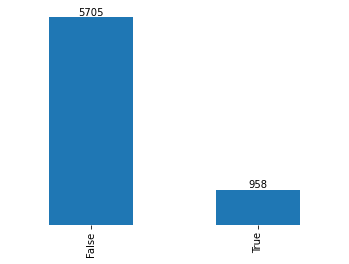

In [4]:
fig, ax = plt.subplots()
values = data["class"].value_counts()
values.plot(kind='bar')
ax.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i in range(len(values)):
    plt.annotate(str(values[i]) ,xy=(values.index[i],values[i]), ha='center', va='bottom')

## preprocessing - text mining

- Language detection
- Suppression des ponctuations et caractères spéciaux
- Tokenisation
- Suppréssion des Stop-word 
- Stemming
- ASCII folding.

In [5]:
data["description_clean"] = data.apply(lambda p : make_text_prep(p, name_column_blacklist, name_column_regex_replace,"description"),axis=1)

In [6]:
list(data["description_clean"])

['menuiser fabric port produit portail aluminium port entre port entre aluminium port garag port entre alu menuiser port garag port portail magasin meubl',
 'chemine accessoir fer forg deplac chanti analys plan techniqu dessin art realis a main ateli art fabriqu francais decor boutiqu lign dev personnalis gratuit marqu reignoux creation produit chenet par feu serviteur plaqu chemine soufflet portail ramp gard corp balcon marquis escali port luminair mobili laureat meilleur ouvri franc qualibat patrimoin viv chemine accessoir ferronner art artisan art ameubl franc concevon objet ornement architectural tous styl decouvr tout creation contemporain benefic expertis professionnel mieux serv prenon charg livraison install chanti soucieux transmettr savoir fair equip charg format jeun interess meti clientel particuli professionnel',
 'bricolag outillag reproduct cle robinetter produit accessoir perceux ampoul ampoul fluo ampoul a led ampoul electr barbecu boulon boulonner bouton meubl caden c

## Summary statistics

In [7]:
# Getting a list of all n-grams
vectorizer = CountVectorizer(ngram_range=(1,1), min_df=3, max_df=0.9, strip_accents='unicode', analyzer="word")
data_parsed = vectorizer.fit_transform(data.description_clean)
BAW = data_parsed.toarray()
vocabulary = vectorizer.get_feature_names()

# Putting BAG into a DataFrame and computing some summary statistics
BAW = pd.DataFrame(BAW, columns=vocabulary)
BAW['Keyword'] = BAW.idxmax(axis=1)
BAW['Max'] = BAW.max(axis=1)
BAW['Sum'] = BAW.drop('Max', axis=1).sum(axis=1)
BAW.head(10)

,abattag,abattoir,abord,abri,abris,acce,accessibilit,accessoir,accompagn,accompagnent,...,wicon,wif,zen,zinc,zinguer,zingueur,zon,Keyword,Max,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,port,7,23
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,art,4,85
2,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,ampoul,4,60
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,peintur,5,58
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,install,3,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,stor,8,80
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,traval,7,43
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,chauffag,1,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,install,7,99
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,fleur,3,58


## Vectoriser  par mot ou par ngram 

### which feature to use description_clean or description?

Rien ne nous assure que le prétraitement des données textuelles soit nécessaire pour entraîner correctement nos algorithmes. Par ailleurs, nous disposons de peu de données et les longueurs des corpus ne sont pas très élevées. Nous allons donc essayer de faire un modèle de base de Random Forest en utilisant chacune des features (description_clean et description) et observer les performances.

#### Par mots

In [8]:
vectorizer = CountVectorizer(ngram_range=(1,1), min_df=3, max_df=0.9, strip_accents='unicode', analyzer="word")

for col in ["description", "description_clean"] :
    # SPLIT donnée d'entrainement et test
    X_train, X_test, y_train, y_test = train_test_split(data[col], data["target"] , test_size = 0.2, random_state=32)
    
    # vectorization des données d'entrainement
    X_train = vectorizer.fit_transform(X_train)
    # vectorization des données de test
    X_test = vectorizer.transform(X_test)
    # entrainement
    rf = RandomForestClassifier()
    rf = rf.fit(X_train, y_train)

    #calcul de la prédiction sur l'échantillon test
    pred_proba_test = rf.predict(X_test)
    pred_proba_train = rf.predict(X_train)

    from sklearn.metrics import roc_auc_score
    print(f"AUC TRAIN with with {col} : {roc_auc_score(y_train, pred_proba_train)}")
    print(f"AUC TEST with with {col} : {roc_auc_score(y_test,pred_proba_test)}")

AUC TRAIN with with description : 0.8497855004030864
AUC TEST with with description : 0.7514083566947003
AUC TRAIN with with description_clean : 0.8497855004030864
AUC TEST with with description_clean : 0.7467983802785566


#### Par ngramm

In [9]:
vectorizer = CountVectorizer(ngram_range=(3,3), min_df=3, max_df=0.9, strip_accents='unicode', analyzer="char")
for col in ["description", "description_clean"] :
    # SPLIT donnée d'entrainement et test
    X_train, X_test, y_train, y_test = train_test_split(data[col], data["target"] , test_size = 0.2, random_state=3)
    
    # vectorization des données d'entrainement
    X_train = vectorizer.fit_transform(X_train)
    # vectorization des données de test
    X_test = vectorizer.transform(X_test)
    # entrainement
    rf = RandomForestClassifier()
    rf = rf.fit(X_train, y_train)

    #calcul de la prédiction sur l'échantillon test
    pred_proba_test = rf.predict(X_test)
    pred_proba_train = rf.predict(X_train)

    from sklearn.metrics import roc_auc_score
    print(f"AUC TRAIN with with {col} : {roc_auc_score(y_train, pred_proba_train)}")
    print(f"AUC TEST with with {col} : {roc_auc_score(y_test,pred_proba_test)}")

AUC TRAIN with with description : 0.860957644287317
AUC TEST with with description : 0.6998038482197667
AUC TRAIN with with description_clean : 0.8614913272282041
AUC TEST with with description_clean : 0.7057627378759976


+ Nous avons remarqué également les ngramm (bigram ou trigram) nous conduisent à plus l'overfitting par rapport au mots car l'ecart entre les performances entre le train set et le test est enorme .Donc nous optérons de vectoriser par mots.


+ Nos prémières remarques des resultats nous amène à dire  que nous devons continuer les *description_clean* et *description* conduisent à peu près au memes resultats. 

**ATTENTION** : Il convient néanmoins de s'assurer de la qualité des données à renseigner dans le descriptif. Pour des données remplies avec des fautes d'orthographe ou des données qui sont remplies sans règles précises alors il serait préférable d'utiliser des données prétraitées . **Comme nous avons aucun controle sur lorsque notre model sera en production alors je préfère garder la stratégie de prétraitement trextuel**

## Quel algorithmes utilisés ?

Désormais, c'est connu de tous, des **données de bonne qualité** avec des **algorithmes simples** conduisent toujours à des résultats meilleurs par rapport aux **modèles très complexes avec  hyperparamètre tunning**  et des données de mauvaises qualités.
C'est le principe du garbage in, garbage out.

Je testerai les algorithmes suivants :
- une **regression logistique sans regularisation** car très facilement interprétable. 
- Un  d'**arbre de décision** pour capter les effets non linéaire tout en sachant que DecisionTreeClassifier est un cas particulier d'arbre de decision avec des branches binaires et construit avec l'**algorithme CART**
- un modèle de **random forest**  avec les paramètres par defaut :
    - nombre d'arbres cart = 100, 
    - critère de split =gini,
    - max_deph =None : arbre individuelle de profondeur maximale car les effets de surapprentissages seront eliminés par le principe de bagging et de la selection aléatoires des features
    - max_features : sqrt(nombre de features dans le dataset initial) 
    
- un Support vector Lineaire car il est connu que le SVM performe bien sur des données textuelles en general
- un KNN car très utilisé pour la classification de test

In [10]:
experimenter(data, [LogisticRegression(),  
                 DecisionTreeClassifier(),
                 SVC(probability=True), 
                 RandomForestClassifier(),
                 KNeighborsClassifier()])

----------classifier : LogisticRegression() ----------
AUC TRAIN: 0.954410628722792
AUC TEST: 0.875494205862304
----------classifier : DecisionTreeClassifier() ----------
AUC TRAIN: 0.9800751665938576
AUC TEST: 0.7915814587593729
----------classifier : SVC(probability=True) ----------
AUC TRAIN: 0.9029423144931457
AUC TEST: 0.8397540768706413
----------classifier : RandomForestClassifier() ----------
AUC TRAIN: 0.971668434884511
AUC TEST: 0.8892742908080331
----------classifier : KNeighborsClassifier() ----------
AUC TRAIN: 0.8921174928751222
AUC TEST: 0.8360285249855801


- Comme il fallait  s y attendre les arbres de decisions CART conduisent à de l'overfiiting.
- Le modèle de regression logistique malgré très simple donne des resultats très proche du random forest.
- le meilleur modèle sur le test et le train set reste le random forest .

**Attention** : On pourrait bien me reprocher d'avoir diviser mes données en test set et train set malgré le peu de données que nous avons car avec le principe de generalisation de l'apprentissage statistique , on pourrait utiliser une cross validation (*Holdout, K-fold, Stratified k-fold, Rolling, Monte Carlo, Leave-p-out, and Leave-one-out* pour estimer l'erreur de nos modèles sans gaspiller le peu de données que nous disposons.
Néanmoins, je préfère jouer la carte de la prudence car meme les techniques de validation croisée sousestime en general les vraies erreurs.

##  Notre Model

### Hyper parametres tunning

In [11]:
#calcul de la prédiction sur l'échantillon test
X_train, X_test, y_train, y_test = train_test_split(data["description"], data["target"] , test_size = 0.2, random_state=202209)
vectorizer = CountVectorizer(ngram_range=(1,1), min_df=3, max_df=0.9, strip_accents='unicode', analyzer="word")

# vectorization des données d'entrainement
X_train = vectorizer.fit_transform(X_train)
# vectorization des données de test
X_test = vectorizer.transform(X_test)

# paramètres
param_grid = { 
    'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 12, 14, 16,18, 20],
    'criterion' :['gini', 'entropy']
}

# grid search
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=2022,), 
                      param_grid=param_grid, 
                      cv= 5, 
                      scoring="roc_auc",
                      n_jobs=-1)

CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 150}

### Meilleur modèle

In [12]:
model = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=10, n_jobs=-1, criterion='entropy', random_state=2022)
model = model.fit(X_train, y_train)

#calcul de la prédiction sur l'échantillon test et train

pred_proba_test = model.predict_proba(X_test)[:,1]
pred_proba_train = model.predict_proba(X_train)[:,1]

# calcul des performances
print(f"AUC TRAIN with with  : {roc_auc_score(y_train, pred_proba_train)}")
print(f"AUC TEST with with : {roc_auc_score(y_test, pred_proba_test)}")

AUC TRAIN with with  : 0.9363791059058475
AUC TEST with with : 0.912883435582822


### Sauvegarde du modèle

In [13]:
with open("./INTERMED/random_forest_model.sav","wb") as f:
    pickle.dump(model,f)

with open("./INTERMED/vectorizer.sav","wb") as f:
    pickle.dump(vectorizer,f)

### Affectation des classes

Nous cherchons ici l'affectation des classes . Nous avons décidé de prédire des probabilités. Sacchant que par défaut le seuil de 0.5 permet de bien prédire les classes d'appartéance.

Nous savons que la courbe permet de trouver le seuil optimal qui permet d'arbrité entre le meilleur niveau **sensitivité** et de la **spécificité**.

##### Optimal thresholds

In [14]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test)
roc_auc = auc(fpr, tpr)
optimal_thr = thresholds[np.argmin((0-fpr)**2 + (1-tpr)**2)]
optimal_tpr = tpr[thresholds==optimal_thr][0]
optimal_fpr = fpr[thresholds==optimal_thr][0]

In [15]:
with open("./INTERMED/optimal_thr.sav","wb") as f:
    pickle.dump(optimal_thr,f)

##### ROC and AUC

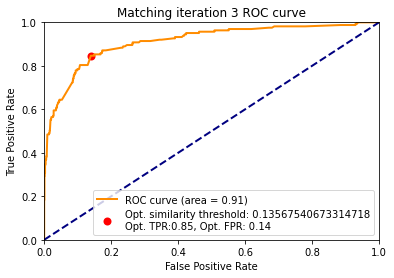

In [16]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter(optimal_fpr, optimal_tpr, color="red", lw=lw, label=f"Opt. similarity threshold: {optimal_thr}\nOpt. TPR:{round(optimal_tpr, 2)}, Opt. FPR: {round(optimal_fpr, 2)}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Matching iteration 3 ROC curve')
plt.legend(loc="lower right")
plt.show()

##### Stratégie de prédiction

Selon la stratégie de l'entreprise, nous pouvons décider de 
+ minimiser le taux de faux positive
+ maximser le taux de vrai positive.
+ Trouver le bon compromis entre les deux situations précedentes (**!!!! Comme le test n'a  rien précedé à ce propos alors nous choiserons cette option**)

Nous regardérons l'accuracy ou le recall car étant mieux approprié à notre études.

Accuracy: 0.86
Recall: 0.8


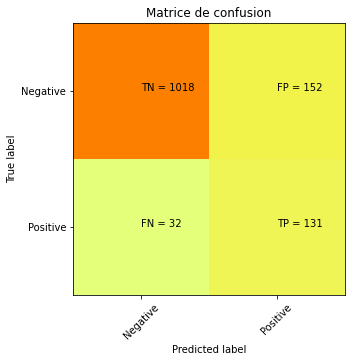

In [17]:
my_confusion_matrix(y_test, (pred_proba_test>optimal_thr).astype(int))

## Deploiement de la solution

In [18]:
input = "entreprises de couverture travaux de couverture travaux de zinguerie tubage de cheminees pose d antennes travaux de ramonage travaux d etancheite travaux de peinture marques velux mathys dimos siplast  entreprises de couverture tubage de conduits de fumee entreprises d etancheite ravalement de facades vente de peinture  de vernis notre groupe est specialise dans les travaux de couverture et de zinguerie nous intervenons pour le tubage de cheminees et pour la pose d antennes et de fenetres de toit nous effectuons des travaux de ramonage  d etancheite et de peinture" 

prediction_individuelle(input)

True

In [19]:
prediction_file(path="./INPUT/act_couv.csv")

## Deploiement avec streamlit

+ voir *script streamlit_prediction_DioTSiaCI.py* pour le developpement de l'application

+ exécuter le *fichier batch Streamlit_app* pour lancer l'application en locale 

+ Solution web de l'application : https://sawadogosalif-test-ds-streamlit-prediction-diotsiaci-579ogr.streamlitapp.com/